# EXPLORATORY DATA ANALYSIS FOR THE REGIONAL DATASET OF THE PROTEZIONE CIVILE

The Exploratory Data Analysis (EDA) has the aim of understanding the data sets by summarizing their main characteristics, often by plotting them visually. This step is very Important especially when the goal of the analysis is to apply Machine Learning techniques. 

The EDA applied on this dataset starts first from the Regional Dataset and then to the Provincial Dataset. The passages applied for both datasets are described in the following table of content.

0. [Import the python packages](#import);

* [Regional dataset](#region):
  1. [Visualization of the rough dataset](#visualization1);
  2. [Visualization of the data type](#type1);
  3. [Rename of the variables](#rename1);
  4. [Dataset dimension](#shape1);
  5. [Number of unique rows](#unique1);
  6. [Removing duplicate rows](#duplicaterows1);
  7. [Summary statistics](#summarystat1);
  8. [Exploring the date variable](#date1);
  9. [Removing useless columns](#uselesscol1);
  10. [Missing and Null data manipulation](#missingdata1);
  11. [Data trend](#trend1);
  12. [Dataset division per year](#division1);

<a class="anchor" id="import"></a>
#### 0. Import the python packages
First thing to do is to import the python packages useful for the analysis. Specifically, 
- **pandas** is a library used for manipulating structured data, cleaning them and it is able to work with time series data, which is the structure of the dataset at hand;
- **numpy** is a library useful to work with matrices and multidimensional arrays, toghether with a set of mathematical functions that allow to work efficiently on this data structures;
- **seaborn** is a library useful for data visualization based on matplotlib. 
- **cufflinks** is a library, based on Plotly, which provides additional visualization tools. It connects the plotly library with pandas to create graphs and charts of dataframes directly. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import create_load_conf_files as conf
%matplotlib inline
sns.set(color_codes=True)
from plotly.offline import iplot
from save_dataframes import save_dataframes
import cufflinks as cf
cf.go_offline()
import os

<a class="anchor" id="region"></a>
## Regional dataset

The data are stored into the GitHub folder of the Dipartimento Protezione Civile.

In [2]:
covid_regions_url="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"

so it is necessary to read them from the URL and store them as dataframe. The dataset has the extension .csv, so the values are comma-separated. 

In [3]:
covid_regions_df=pd.read_csv(covid_regions_url)

<a class="anchor" id="visualization1"></a>
#### 1. Visualization of the rough dataset

In [4]:
covid_regions_df.head()

data stato  codice_regione denominazione_regione        lat  \
0  2020-02-24T18:00:00   ITA              13               Abruzzo  42.351222   
1  2020-02-24T18:00:00   ITA              17            Basilicata  40.639471   
2  2020-02-24T18:00:00   ITA              18              Calabria  38.905976   
3  2020-02-24T18:00:00   ITA              15              Campania  40.839566   
4  2020-02-24T18:00:00   ITA               8        Emilia-Romagna  44.494367   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  16.594402                       0                  0                     0   
3  14.250850                       0                  0                     0   
4  11.341721                      10                  2                    12   

   isolamento_domiciliare  ...  note  ingressi_terapia_intensiva  note_test  \
0                       0  ...   NaN                         NaN        NaN   
1                       0  ...   NaN                         NaN        NaN   
2                       0  ...   NaN                         NaN        NaN   
3                       0  ...   NaN                         NaN        NaN   
4                       6  ...   NaN                         NaN        NaN   

   note_casi  totale_positivi_test_molecolare  \
0        NaN                              NaN   
1        NaN                              NaN   
2        NaN                              NaN   
3        NaN                              NaN   
4        NaN                              NaN   

   totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
0                                     NaN                      NaN   
1                                     NaN                      NaN   
2                                     NaN                      NaN   
3                                     NaN                      NaN   
4                                     NaN                      NaN   

   tamponi_test_antigenico_rapido  codice_nuts_1  codice_nuts_2  
0                             NaN            NaN            NaN  
1                             NaN            NaN            NaN  
2                             NaN            NaN            NaN  
3                             NaN            NaN            NaN  
4                             NaN            NaN            NaN  

[5 rows x 30 columns]

In [5]:
covid_regions_df.tail()

data stato  codice_regione denominazione_regione  \
9949  2021-06-11T17:00:00   ITA              19               Sicilia   
9950  2021-06-11T17:00:00   ITA               9               Toscana   
9951  2021-06-11T17:00:00   ITA              10                Umbria   
9952  2021-06-11T17:00:00   ITA               2         Valle d'Aosta   
9953  2021-06-11T17:00:00   ITA               5                Veneto   

            lat       long  ricoverati_con_sintomi  terapia_intensiva  \
9949  38.115697  13.362357                     337                 38   
9950  43.769231  11.255889                     232                 73   
9951  43.106758  12.388247                      40                  5   
9952  45.737503   7.320149                       5                  0   
9953  45.434905  12.338452                     146                 31   

      totale_ospedalizzati  isolamento_domiciliare  ...  \
9949                   375                    6489  ...   
9950                   305                    4481  ...   
9951                    45                    1057  ...   
9952                     5                     107  ...   
9953                   177                    5891  ...   

                                                   note  \
9949                                                NaN   
9950                                                NaN   
9951  - Si fa presente che 1 dei ricoveri NON UTI, n...   
9952                                                NaN   
9953  Nei valori riportati per le terapie intensive ...   

      ingressi_terapia_intensiva  note_test  note_casi  \
9949                         3.0        NaN        NaN   
9950                         3.0        NaN        NaN   
9951                         0.0        NaN        NaN   
9952                         0.0        NaN        NaN   
9953                         2.0        NaN        NaN   

      totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
9949                         228894.0                                     0.0   
9950                         239638.0                                  3468.0   
9951                          56635.0                                     0.0   
9952                          10987.0                                   666.0   
9953                         412578.0                                 11883.0   

      tamponi_test_molecolare  tamponi_test_antigenico_rapido  codice_nuts_1  \
9949                2566003.0                       2100425.0            ITG   
9950                3749771.0                       1147250.0            ITI   
9951                 944324.0                        445056.0            ITI   
9952                  98487.0                         35337.0            ITC   
9953                5500571.0                       2763423.0            ITH   

      codice_nuts_2  
9949           ITG1  
9950           ITI1  
9951           ITI2  
9952           ITC2  
9953           ITH3  

[5 rows x 30 columns]

From the output above it is possible to see that in the dataset there are both categorical and numerical data. Moreover, the dataset contains data starting from February 2020 til May 2021.

<a class="anchor" id="type1"></a>
#### 2. Visualization of the data type

Checking the datatypes is useful to see if the dataset presents string data and if it is necessary to convert them in some way.

In [6]:
covid_regions_df.dtypes

data                                       object
stato                                      object
codice_regione                              int64
denominazione_regione                      object
lat                                       float64
long                                      float64
ricoverati_con_sintomi                      int64
terapia_intensiva                           int64
totale_ospedalizzati                        int64
isolamento_domiciliare                      int64
totale_positivi                             int64
variazione_totale_positivi                  int64
nuovi_positivi                              int64
dimessi_guariti                             int64
deceduti                                    int64
casi_da_sospetto_diagnostico              float64
casi_da_screening                         float64
totale_casi                                 int64
tamponi                                     int64
casi_testati                              float64


<a class="anchor" id="rename1"></a>
#### 3. Rename the variables:

Since the variables present in the dataset are all in Italian, a dictionary has been created in order to rename the variables.

In [7]:
region_it_en=conf.load_conf_file("region_it_en")

In [8]:
covid_regions_df=covid_regions_df.rename(columns=region_it_en)
covid_regions_df.columns

Index(['Date', 'Country', 'Region_code', 'Region_name', 'Latitude',
       'Longitude', 'Hospitalyzed_symptoms', 'Intensive_care',
       'Total_hospitalized', 'Home_isolation', 'Total_positive',
       'Total_positive_variation', 'New_positive', 'Hospital_discharged',
       'Deceased_patients', 'Diagnostic_suspect_cases', 'Screening_case',
       'Total_cases', 'swab_tests', 'Test_cases', 'Notes',
       'Intensive_care_entrance', 'Test_notes', 'Case_notes',
       'Total_positive_molecular_test', 'Total_positive_rapid_test',
       'Molecular_swab_test', 'Rapid_swab_text', 'Nuts_code_1', 'Nuts_code_2'],
      dtype='object')

<a class="anchor" id="shape1"></a>
#### 4. Dataset dimension
Checking the dimendion of the dataset:

In [9]:
covid_regions_df.shape

(9954, 30)

From the displayed output it is possible to see that there are 9324 rows and 30 columns.

<a class="anchor" id="unique1"></a>
#### 5. Number of unique rows

Looking at the number of unique rows in our dataset:

In [10]:
covid_regions_df.nunique()

Date                              474
Country                             1
Region_code                        21
Region_name                        21
Latitude                           21
Longitude                          22
Hospitalyzed_symptoms            2391
Intensive_care                    598
Total_hospitalized               2544
Home_isolation                   6360
Total_positive                   6498
Total_positive_variation         2113
New_positive                     1932
Hospital_discharged              7906
Deceased_patients                4188
Diagnostic_suspect_cases         2711
Screening_case                   2205
Total_cases                      8464
swab_tests                       9749
Test_cases                       8739
Notes                             917
Intensive_care_entrance            67
Test_notes                         92
Case_notes                        265
Total_positive_molecular_test    3078
Total_positive_rapid_test        1394
Molecular_sw

<a class="anchor" id="duplicaterows1"></a>
#### 6. Removing duplicated rows

The removal of duplicated rows is often a handy thing to do because a huge dataset as in this case containing more than 9000 rows often have some duplicated data which might be disturbing for the analysis. 

In [11]:
duplicated_rows_df=covid_regions_df[covid_regions_df.duplicated()]
duplicated_rows_df

Empty DataFrame
Columns: [Date, Country, Region_code, Region_name, Latitude, Longitude, Hospitalyzed_symptoms, Intensive_care, Total_hospitalized, Home_isolation, Total_positive, Total_positive_variation, New_positive, Hospital_discharged, Deceased_patients, Diagnostic_suspect_cases, Screening_case, Total_cases, swab_tests, Test_cases, Notes, Intensive_care_entrance, Test_notes, Case_notes, Total_positive_molecular_test, Total_positive_rapid_test, Molecular_swab_test, Rapid_swab_text, Nuts_code_1, Nuts_code_2]
Index: []

[0 rows x 30 columns]

As it is possible to see, there are no duplicated rows.

<a class="anchor" id="summarystats1"></a>
#### 7. Sumary statistics

Looking at the summary statistics of the dataset:

In [12]:
covid_regions_df.describe()

Region_code     Latitude    Longitude  Hospitalyzed_symptoms  \
count  9954.000000  9954.000000  9954.000000            9954.000000   
mean     11.857143    43.046293    12.225955             693.595941   
std       6.274113     2.488906     2.659081            1245.424999   
min       1.000000    38.115697     7.320149               0.000000   
25%       7.000000    41.125596    11.121231              40.000000   
50%      12.000000    43.616760    12.388247             205.000000   
75%      17.000000    45.434905    13.768136             716.750000   
max      22.000000    46.499335    16.867367           12077.000000   

       Intensive_care  Total_hospitalized  Home_isolation  Total_positive  \
count     9954.000000         9954.000000     9954.000000     9954.000000   
mean        80.890697          774.486639    11829.785614    12604.272252   
std        139.183379         1379.717440    20932.071105    21891.698766   
min          0.000000            0.000000        0.000000        0.000000   
25%          4.000000           45.000000      397.000000      468.000000   
50%         25.000000          233.000000     2525.500000     2992.500000   
75%         96.000000          821.750000    11459.500000    12529.750000   
max       1381.000000        13328.000000   155066.000000   164406.000000   

       Total_positive_variation  New_positive  ...  Diagnostic_suspect_cases  \
count               9954.000000   9954.000000  ...               3402.000000   
mean                  16.578059    425.519791  ...              16472.772193   
std                  812.135100    822.514200  ...              32188.413270   
min               -21926.000000   -229.000000  ...                  0.000000   
25%                  -47.000000     14.000000  ...               2052.250000   
50%                    2.000000     99.000000  ...               5290.500000   
75%                   77.000000    441.000000  ...              19285.750000   
max                10263.000000  11489.000000  ...             305002.000000   

       Screening_case    Total_cases    swab_tests    Test_cases  \
count      3402.00000    9954.000000  9.954000e+03  8.799000e+03   
mean       6319.39565   69487.290536  1.043240e+06  5.878328e+05   
std       15054.35195  123995.315308  1.640303e+06  7.808085e+05   
min           0.00000       0.000000  0.000000e+00  3.482000e+03   
25%         117.00000    3373.000000  9.668450e+04  1.054960e+05   
50%        1493.00000   15353.500000  3.623035e+05  2.681890e+05   
75%        5469.00000   71928.000000  1.216825e+06  7.073150e+05   
max      113150.00000  838963.000000  1.103082e+07  4.391443e+06   

       Intensive_care_entrance  Total_positive_molecular_test  \
count              4011.000000                    3108.000000   
mean                  7.498629                  159439.927606   
std                   9.532602                  164865.962965   
min                   0.000000                    7382.000000   
25%                   1.000000                   41272.500000   
50%                   4.000000                   86702.500000   
75%                  11.000000                  238711.750000   
max                  86.000000                  785385.000000   

       Total_positive_rapid_test  Molecular_swab_test  Rapid_swab_text  
count                3108.000000         3.108000e+03     3.108000e+03  
mean                 4382.481982         1.896061e+06     4.384525e+05  
std                  8460.702537         1.820711e+06     5.766896e+05  
min                     0.000000         6.615200e+04     0.000000e+00  
25%                     0.000000         5.978232e+05     3.474025e+04  
50%                   229.000000         1.103589e+06     1.865790e+05  
75%                  6628.000000         2.874408e+06     5.715180e+05  
max                 53578.000000         9.098782e+06     2.763423e+06  

[8 rows x 22 columns]

The option include=object allows to display a descriptive statistics even for categorical data

In [13]:
covid_regions_df.describe(include=object)

Date Country Region_name  \
count                  9954    9954        9954   
unique                  474       1          21   
top     2021-01-23T17:00:00     ITA   Lombardia   
freq                     21    9954         474   

                                                    Notes  \
count                                                1357   
unique                                                917   
top     Si fa presente che 5 dei ricoveri NON UTI, non...   
freq                                                   19   

                                               Test_notes  \
count                                                 141   
unique                                                 92   
top     Positivi diagnosticati solo con test antigenic...   
freq                                                   38   

                                               Case_notes Nuts_code_1  \
count                                                 412        3108   
unique                                                265           5   
top     In Regione Liguria la positività al test antig...         ITF   
freq                                                   57         888   

       Nuts_code_2  
count         3108  
unique          21  
top           ITG2  
freq           148

<a class="anchor" id="date1"></a>
#### 8. Exploring the Date variable

Looking at the type of variable Date:

In [14]:
print(covid_regions_df["Date"].head())

0    2020-02-24T18:00:00
1    2020-02-24T18:00:00
2    2020-02-24T18:00:00
3    2020-02-24T18:00:00
4    2020-02-24T18:00:00
Name: Date, dtype: object


As we have seen from the description of the dataset, the Date variable is coded as object, but in order to work with it, it is useful to recode it as a datetime variable.

In [15]:
covid_regions_df["Date"]=pd.to_datetime(covid_regions_df["Date"], format="%Y-%m-%d")
print(covid_regions_df["Date"].head())

0   2020-02-24 18:00:00
1   2020-02-24 18:00:00
2   2020-02-24 18:00:00
3   2020-02-24 18:00:00
4   2020-02-24 18:00:00
Name: Date, dtype: datetime64[ns]


<a class="anchor" id="uselesscol1"></a>
#### 9. Removing useless colums

Since we have 30 variables in our datase, it might be useful to remove some of them that will not be used in the analysis, such as "Country","Latitude","Longitude","Notes","Test_notes","Case_notes","Nuts_code_1","Nuts_code_2".

In [16]:
covid_regions_df=covid_regions_df.drop(columns=["Country","Latitude","Longitude","Notes","Test_notes","Case_notes",
                                               "Nuts_code_1","Nuts_code_2"])
covid_regions_df.columns

Index(['Date', 'Region_code', 'Region_name', 'Hospitalyzed_symptoms',
       'Intensive_care', 'Total_hospitalized', 'Home_isolation',
       'Total_positive', 'Total_positive_variation', 'New_positive',
       'Hospital_discharged', 'Deceased_patients', 'Diagnostic_suspect_cases',
       'Screening_case', 'Total_cases', 'swab_tests', 'Test_cases',
       'Intensive_care_entrance', 'Total_positive_molecular_test',
       'Total_positive_rapid_test', 'Molecular_swab_test', 'Rapid_swab_text'],
      dtype='object')

<a class="anchor" id="missingdata1"></a>
#### 10. Missing and Null data manipulaiton

An important passage in the EDA is the detection and removal or substitution of missing or null values. Sometimes in statistical analysis, missing data and null data are replaced the mean or average of that column, but sometimes, if we are in presence of a huge dataset and the missing values are just a few, it can be a good decision just to drop them.

Let's look at how many missing data and null values are present in the dataset:

In [17]:
covid_regions_df.isnull().sum()

Date                                0
Region_code                         0
Region_name                         0
Hospitalyzed_symptoms               0
Intensive_care                      0
Total_hospitalized                  0
Home_isolation                      0
Total_positive                      0
Total_positive_variation            0
New_positive                        0
Hospital_discharged                 0
Deceased_patients                   0
Diagnostic_suspect_cases         6552
Screening_case                   6552
Total_cases                         0
swab_tests                          0
Test_cases                       1155
Intensive_care_entrance          5943
Total_positive_molecular_test    6846
Total_positive_rapid_test        6846
Molecular_swab_test              6846
Rapid_swab_text                  6846
dtype: int64

From the output above it is possible to see that there are null values just in correspondence of the columns "Diagnostic suspect cases", Screening_cases", "Test cases", "Intensive care entrance", " Total positive molecular test" "total positive rapid test", "molecular swab test" and "Rapid swab test". 

Now, we see whether there are missing datas

In [18]:
covid_regions_df.isna().sum()

Date                                0
Region_code                         0
Region_name                         0
Hospitalyzed_symptoms               0
Intensive_care                      0
Total_hospitalized                  0
Home_isolation                      0
Total_positive                      0
Total_positive_variation            0
New_positive                        0
Hospital_discharged                 0
Deceased_patients                   0
Diagnostic_suspect_cases         6552
Screening_case                   6552
Total_cases                         0
swab_tests                          0
Test_cases                       1155
Intensive_care_entrance          5943
Total_positive_molecular_test    6846
Total_positive_rapid_test        6846
Molecular_swab_test              6846
Rapid_swab_text                  6846
dtype: int64

As it is visible from the output displayed above, there are some columns which contains missing values. Hence, we substitute them with 0.0 values. 

In [19]:
covid_regions_df=covid_regions_df.replace(np.nan, 0)
covid_regions_df

Date  Region_code     Region_name  Hospitalyzed_symptoms  \
0    2020-02-24 18:00:00           13         Abruzzo                      0   
1    2020-02-24 18:00:00           17      Basilicata                      0   
2    2020-02-24 18:00:00           18        Calabria                      0   
3    2020-02-24 18:00:00           15        Campania                      0   
4    2020-02-24 18:00:00            8  Emilia-Romagna                     10   
...                  ...          ...             ...                    ...   
9949 2021-06-11 17:00:00           19         Sicilia                    337   
9950 2021-06-11 17:00:00            9         Toscana                    232   
9951 2021-06-11 17:00:00           10          Umbria                     40   
9952 2021-06-11 17:00:00            2   Valle d'Aosta                      5   
9953 2021-06-11 17:00:00            5          Veneto                    146   

      Intensive_care  Total_hospitalized  Home_isolation  Total_positive  \
0                  0                   0               0               0   
1                  0                   0               0               0   
2                  0                   0               0               0   
3                  0                   0               0               0   
4                  2                  12               6              18   
...              ...                 ...             ...             ...   
9949              38                 375            6489            6864   
9950              73                 305            4481            4786   
9951               5                  45            1057            1102   
9952               0                   5             107             112   
9953              31                 177            5891            6068   

      Total_positive_variation  New_positive  ...  Diagnostic_suspect_cases  \
0                            0             0  ...                       0.0   
1                            0             0  ...                       0.0   
2                            0             0  ...                       0.0   
3                            0             0  ...                       0.0   
4                            0            18  ...                       0.0   
...                        ...           ...  ...                       ...   
9949                      -497           273  ...                       0.0   
9950                      -186           146  ...                       0.0   
9951                       -23            16  ...                       0.0   
9952                        -4             4  ...                       0.0   
9953                      -117            77  ...                       0.0   

      Screening_case  Total_cases  swab_tests  Test_cases  \
0                0.0            0           5         0.0   
1                0.0            0           0         0.0   
2                0.0            0           1         0.0   
3                0.0            0          10         0.0   
4                0.0           18         148         0.0   
...              ...          ...         ...         ...   
9949             0.0       228894     4666428   1781750.0   
9950             0.0       243106     4897021   2280436.0   
9951             0.0        56635     1389380    383051.0   
9952             0.0        11653      133824     63954.0   
9953             0.0       424461     8263994   1787175.0   

      Intensive_care_entrance  Total_positive_molecular_test  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   
...                       ...                            ...   
9949            

<a class="anchor" id="trend1"></a>
#### 11. Data trend

It is interesting to have a general idea of the distribution of the data over the two years. To do so, it is useful to create a dynamic graph to look at the general trend of covid through the two years:

In [20]:
covid_regions_trend=covid_regions_df.pivot(columns="Region_name", values="Total_cases")

<AxesSubplot:ylabel='Density'>

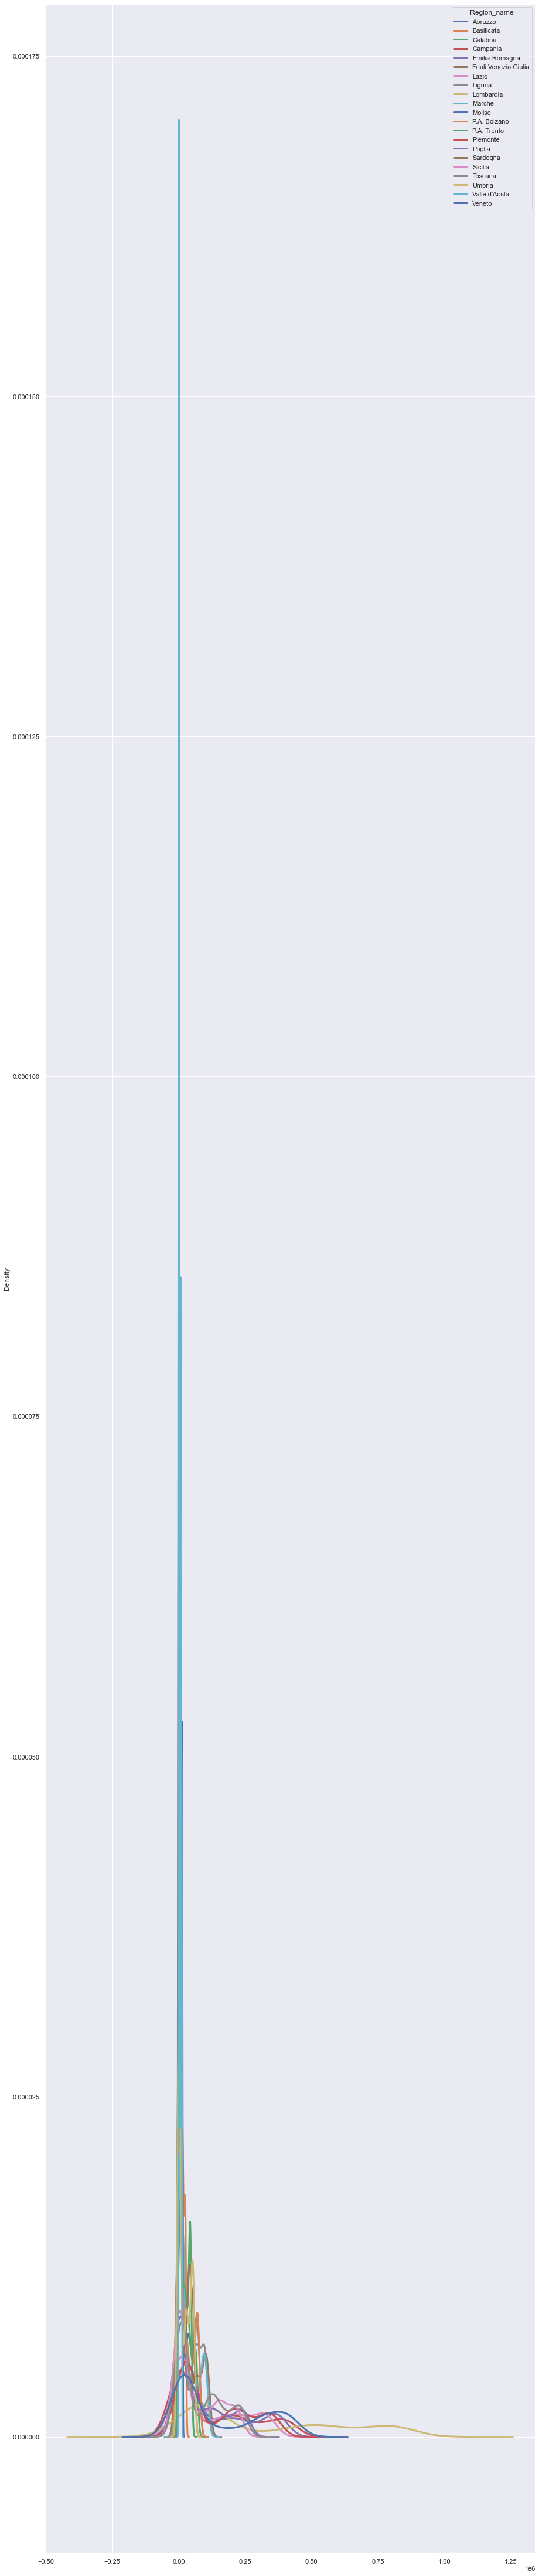

In [21]:
# plotting multiple density plot for each region
covid_regions_trend.plot.kde(figsize = (15, 80),
                   linewidth = 3)

In [22]:
covid_regions_df.iplot(kind='bar',x='Date',y='Total_cases', xTitle='Date', yTitle='Total Cases')

As it is possible to see, the number of total cases tend to increase from november 2020 and stay quite high til may 2021

<a class="anchor" id="division1"></a>
#### 12. Dataset division per year


Now we create two new datasets, one for the year 2020 and one for the year 2021.

First we start by creating a column "Year" that will be used to filter the data.

In [23]:
covid_regions_df["Year"]=covid_regions_df.Date.dt.year
covid_regions_df.head()
covid_regions_df.tail()

Date  Region_code    Region_name  Hospitalyzed_symptoms  \
9949 2021-06-11 17:00:00           19        Sicilia                    337   
9950 2021-06-11 17:00:00            9        Toscana                    232   
9951 2021-06-11 17:00:00           10         Umbria                     40   
9952 2021-06-11 17:00:00            2  Valle d'Aosta                      5   
9953 2021-06-11 17:00:00            5         Veneto                    146   

      Intensive_care  Total_hospitalized  Home_isolation  Total_positive  \
9949              38                 375            6489            6864   
9950              73                 305            4481            4786   
9951               5                  45            1057            1102   
9952               0                   5             107             112   
9953              31                 177            5891            6068   

      Total_positive_variation  New_positive  ...  Screening_case  \
9949                      -497           273  ...             0.0   
9950                      -186           146  ...             0.0   
9951                       -23            16  ...             0.0   
9952                        -4             4  ...             0.0   
9953                      -117            77  ...             0.0   

      Total_cases  swab_tests  Test_cases  Intensive_care_entrance  \
9949       228894     4666428   1781750.0                      3.0   
9950       243106     4897021   2280436.0                      3.0   
9951        56635     1389380    383051.0                      0.0   
9952        11653      133824     63954.0                      0.0   
9953       424461     8263994   1787175.0                      2.0   

      Total_positive_molecular_test  Total_positive_rapid_test  \
9949                       228894.0                        0.0   
9950                       239638.0                     3468.0   
9951                        56635.0                        0.0   
9952                        10987.0                      666.0   
9953                       412578.0                    11883.0   

      Molecular_swab_test  Rapid_swab_text  Year  
9949            2566003.0        2100425.0  2021  
9950            3749771.0        1147250.0  2021  
9951             944324.0         445056.0  2021  
9952              98487.0          35337.0  2021  
9953            5500571.0        2763423.0  2021  

[5 rows x 23 columns]

Now we split the dataset into two subsets, one for each year.

In [24]:
covid_regions_2020=covid_regions_df[covid_regions_df["Year"]==2020]
covid_regions_2020.shape

(6552, 23)

In [25]:
covid_regions_2021=covid_regions_df[covid_regions_df["Year"]==2021]
covid_regions_2021.shape

(3402, 23)

In [26]:
covid_regions_2021.head()

Date  Region_code     Region_name  Hospitalyzed_symptoms  \
6552 2021-01-01 17:00:00           13         Abruzzo                    435   
6553 2021-01-01 17:00:00           17      Basilicata                     83   
6554 2021-01-01 17:00:00           18        Calabria                    233   
6555 2021-01-01 17:00:00           15        Campania                   1359   
6556 2021-01-01 17:00:00            8  Emilia-Romagna                   2643   

      Intensive_care  Total_hospitalized  Home_isolation  Total_positive  \
6552              38                 473           10900           11373   
6553               5                  88            6053            6141   
6554              18                 251            8612            8863   
6555             104                1463           76865           78328   
6556             231                2874           53913           56787   

      Total_positive_variation  New_positive  ...  Screening_case  \
6552                       300           410  ...             0.0   
6553                        90           156  ...             0.0   
6554                        46           345  ...             0.0   
6555                      1073          1734  ...             0.0   
6556                      -559          2629  ...             0.0   

      Total_cases  swab_tests  Test_cases  Intensive_care_entrance  \
6552        35723      519874    270995.0                      3.0   
6553        10982      185256    118358.0                      1.0   
6554        24265      442569    423838.0                      3.0   
6555       191407     2055822   1375469.0                     19.0   
6556       174141     2583512   1232042.0                     11.0   

      Total_positive_molecular_test  Total_positive_rapid_test  \
6552                            0.0                        0.0   
6553                            0.0                        0.0   
6554                            0.0                        0.0   
6555                            0.0                        0.0   
6556                            0.0                        0.0   

      Molecular_swab_test  Rapid_swab_text  Year  
6552                  0.0              0.0  2021  
6553                  0.0              0.0  2021  
6554                  0.0              0.0  2021  
6555                  0.0              0.0  2021  
6556                  0.0              0.0  2021  

[5 rows x 23 columns]

And then we save the dataset into an external csv file in the folder results.

In [27]:
path="../Results/covid_regions_2020.csv"

save_dataframes(covid_regions_2020,path)

In [29]:
path="../Results/covid_regions_2021.csv"

save_dataframes(covid_regions_2021,path)